In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from datetime import datetime

In [4]:
df = pd.read_json("/home/zeng/Desktop/H3N2/data/Isolation_information/ioslation_information.json", orient='index')
df = df.replace('', np.nan)

In [5]:
df['region'] = df['location'].str.split(" / ").str.get(0)
df['country'] = df['location'].str.split(" / ").str.get(1)
df.head()

,HA,MP,NA,NP,NS,PA,PB1,PB2,date,location,name,region,country
EPI_ISL_357698,EPI1447700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003-01-01,Asia / Malaysia,A/Malaysia/1016/2003,Asia,Malaysia
EPI_ISL_357668,EPI1447649,EPI1447644,EPI1447648,EPI1447642,EPI1447643,EPI1447645,EPI1447647,EPI1447646,2003-05-20,Oceania / New Zealand / Waikato / Waikato,A/Waikato/1/2003,Oceania,New Zealand
EPI_ISL_357648,EPI1447603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2002-12-01,Oceania / Australia / Tasmania,A/Victoria/101/2003,Oceania,Australia
EPI_ISL_357641,EPI1447592,NaN,EPI1447591,NaN,NaN,NaN,NaN,NaN,2003-08-26,Oceania / Australia,A/Tasmania/1/2003,Oceania,Australia
EPI_ISL_357613,EPI1447537,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003-01-21,Asia / Singapore,A/Singapore/31/2003,Asia,Singapore


In [6]:
df.region.value_counts()

North America    32651
Asia             22127
Europe           19666
Oceania           6581
South America     4083
Africa            2516
/ Taiwan             5
/ Laos               4
/ SPAIN              4
Name: region, dtype: int64

In [7]:
df.country.value_counts()

United States                       24915
Canada                               6161
China                                5457
Australia                            5111
Japan                                4688
Spain                                3222
United Kingdom                       2437
France                               2107
Brazil                               1567
Hong Kong (SAR)                      1364
Russian Federation                   1363
Singapore                            1255
Taiwan                               1181
Netherlands                          1156
Germany                              1156
New Zealand                          1137
Sweden                               1019
India                                 965
Korea Republic of                     954
Thailand                              882
Austria                               818
Italy                                 771
Chile                                 730
Norway                            

In [8]:
df['country'][df['region'] == '/ Taiwan'] = 'Taiwan'
df['region'][df['region'] == '/ Taiwan'] = 'Asia'

df['country'][df['region'] == '/ SPAIN'] = 'Spain'
df['region'][df['region'] == '/ SPAIN'] = 'Europe'

df['country'][df['region'] == '/ Laos'] = 'Laos'
df['region'][df['region'] == '/ Laos'] = 'Asia'

/home/zeng/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/zeng/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/zeng/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/zeng/anaconda3/lib/python3.7/site-pac

In [9]:
df.groupby('region').count()

,HA,MP,NA,NP,NS,PA,PB1,PB2,date,location,name,country
region,,,,,,,,,,,,
Africa,2482,1270,2136,884,870,867,852,844,2516,2516,2516,2516
Asia,20046,8979,13760,4904,4929,4987,4855,4725,22136,22136,22136,22133
Europe,19026,6204,13035,5162,5139,4887,4657,4778,19670,19670,19670,19663
North America,32389,22658,23528,20523,20356,19531,20048,20095,32651,32651,32651,32649
Oceania,6514,5149,5718,1800,1764,1785,1774,1774,6581,6581,6581,6581
South America,3971,2135,2742,1925,1916,1890,1898,1901,4083,4083,4083,4082


In [37]:
df.groupby('country').count()

,HA,MP,NA,NP,NS,PA,PB1,PB2,date,location,name,region
country,,,,,,,,,,,,
Afghanistan,78,72,72,71,70,70,70,69,78,78,78,78
Albania,44,13,43,11,11,11,11,11,44,44,44,44
Algeria,34,2,32,0,0,0,0,0,34,34,34,34
American Samoa,13,9,13,2,2,2,2,2,13,13,13,13
Anguilla,3,3,3,0,0,0,0,0,3,3,3,3
Argentina,506,196,301,163,162,159,157,157,510,510,510,510
Armenia,45,0,45,0,0,0,0,0,45,45,45,45
Aruba,12,11,12,0,0,0,0,0,12,12,12,12
Australia,5053,3996,4470,1129,1096,1118,1111,1111,5111,5111,5111,5111


In [91]:
# country number of each region
df.drop_duplicates(['country']).groupby('region').size()

region
Africa           31
Asia             46
Europe           43
North America    29
Oceania          19
South America    13
dtype: int64

In [11]:
df_us = df[df['country'] == 'United States']

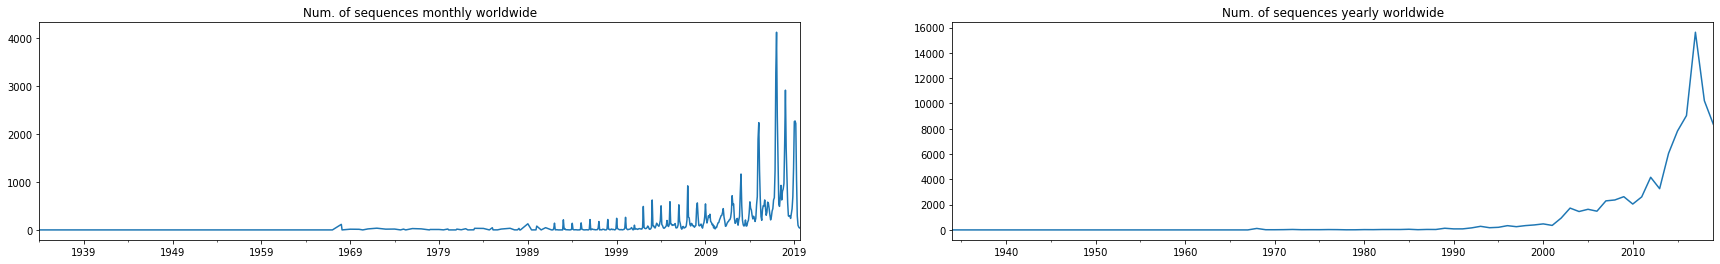

In [77]:
time_index_by_month = pd.to_datetime(df.date.values).to_period('M')
time_index_by_year = pd.to_datetime(df.date.values).to_period('Y')

fig, axes = plt.subplots(1, 2, figsize=(30, 4))
df.groupby(time_index_by_month).size().plot(ax=axes[0], title="Num. of sequences monthly worldwide")
df.groupby(time_index_by_year).size().plot(ax=axes[1], title="Num. of sequences yearly worldwide")

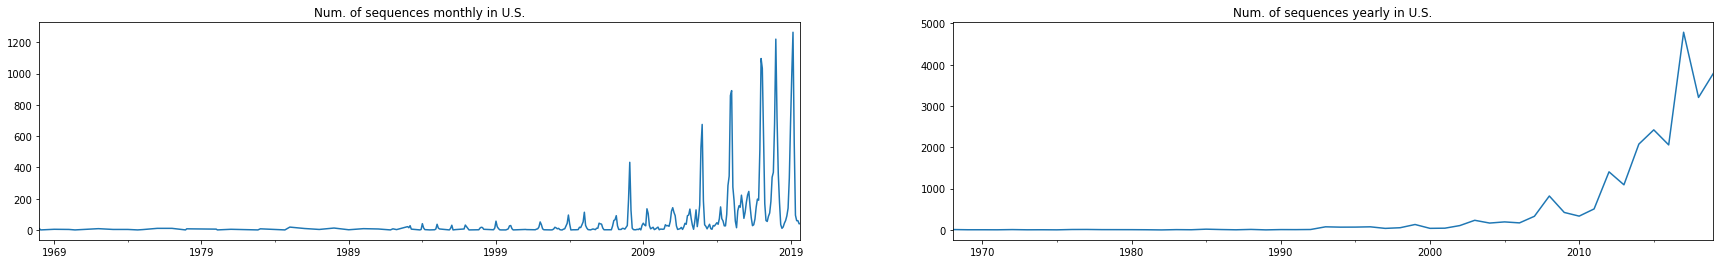

In [80]:
time_index_by_month = pd.to_datetime(df_us.date.values).to_period('M')
time_index_by_year = pd.to_datetime(df_us.date.values).to_period('Y')

fig, axes = plt.subplots(1, 2, figsize=(30, 4))
df_us.groupby(time_index_by_month).size().plot(ax=axes[0], title="Num. of sequences monthly in U.S.")
df_us.groupby(time_index_by_year).size().plot(ax=axes[1], title="Num. of sequences yearly in U.S.")

In [86]:
df_us.iloc[:,0:8].groupby(time_index_by_year).count()

,HA,MP,NA,NP,NS,PA,PB1,PB2
1968,8,9,9,9,9,7,7,7
1969,4,4,4,4,4,3,3,3
1970,5,4,4,4,4,4,4,4
1971,4,3,4,4,3,3,3,3
1972,7,5,6,7,5,5,5,5
1973,2,1,1,3,1,1,1,1
1974,5,4,4,4,4,4,4,4
1975,3,1,1,1,1,1,1,1
1976,10,9,9,10,9,9,9,9
1977,11,8,9,9,9,7,7,7


In [105]:
year2epi = pd.Series(df_us.index, index=time_index_by_year)

In [161]:
sampling = year2epi.sort_index()['2009':'2019'].groupby(level=0) \
                                    .apply(lambda x: x.sample(100)) \
                                    .reset_index(drop=True, level=0) \
                                    .values

In [ ]:
df_us.reindex(sampling).HA.to_csv('/home/zeng/python_work/bioinfo/mosaic/sampling.txt', header=False)

Error: Error: Activating Python 3.7.4 64-bit ('biopy': conda) to run Jupyter failed with Error: Command failed: . activate biopy && echo 'e8b39361-0157-4923-80e1-22d70d46dee6' && python /home/zeng/.vscode/extensions/ms-python.python-2019.11.49689/pythonFiles/printEnvVariables.py
bash: activate: No such file or directory
.